In [52]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime as dt
from datetime import datetime, timedelta

In [5]:
# Twitter API credentials
CONSUMER_KEY = "JMa27mVbSzGBtBmHspqQ4ln7p"
CONSUMER_SECRET = "IgkubFPCyPSbk2NGaoca6ULuqoOuFfFhVOnW8wSOclud7g8VSe"
ACCESS_KEY = "1214114293546807297-xkXbFVM3jZHqzdtKnLm303GJJa5qpO"
ACCESS_SECRET = "TCcGYTxEdR08OHFngGw6j8ExAmSsEyB8H6Z4UC3ywf9YZ"


class TwitterExtractor:
    def __init__(self,consumer_key = CONSUMER_KEY,consumer_secret = CONSUMER_SECRET,access_key = ACCESS_KEY,access_secret = ACCESS_SECRET):

        # Store secrets as attributes
        self._consumer_key = consumer_key
        self._consumer_secret = consumer_secret
        self._access_key = access_key
        self._access_secret = access_secret

        # Authenticate to the API
        self.auth = tweepy.OAuthHandler(self._consumer_key,self._consumer_secret)
        self.auth.set_access_token(self._access_key,self._access_secret)
        self.api = tweepy.API(self.auth)


    def fetch_tweets_by_keyword(self,keyword,lang="en",n=100,tweet_mode="extended",raw_tweets = False, since_ID=None):

        # Key word is the content you are trying to search for. This can be a username "@", a hashatg "#" or any other term (ex: 'urban decay').
        
        # A list of multiple terms can be passed as well to gather multiple searches at once.
        if isinstance(keyword,list):
            tweets = [self.fetch_tweets_by_keyword(h) for h in keyword]
            tweets = pd.concat(tweets,ignore_index = True)
            return tweets

        # For a single term
        else:
            tweets = self.api.search(q=keyword, result_type="recent", lang=lang,count=n,tweet_mode=tweet_mode, since_id= since_ID)
        

            if raw_tweets:
                return tweets

            tweets = [
                {
                    "tweet_id":tweet.id_str,
                    "created_at":tweet.created_at,
                    "text":tweet.full_text,
                    "author":tweet.author.name,
                    "author_id":tweet.author.id,
                    "retweet_count":tweet.retweet_count,
                    "favorite_count":tweet.favorite_count,
                    "query":keyword,
                    "hashtags":tweet.entities["hashtags"],
                }
            for tweet in tweets]
            return pd.DataFrame(tweets)

    def continuous_fetching (self,file, keyword,lang="en",n=100,tweet_mode="extended",raw_tweets = False):
        maxTweets = 1000000000 # Some arbitrary large number
        tweetCount = 0
        while tweetCount < maxTweets:
            try:
                data_tweets = pd.read_csv(file)
                since_id2 = data_tweets.tweet_id.max()
                new_tweets = self.fetch_tweets_by_keyword(keyword, since_ID=since_id2)
                all_tweets = pd.concat([data_tweets,new_tweets])
                tweetCount = len(all_tweets)
                all_tweets.to_csv(file, index=False)
                
                
                if  new_tweets.empty==True:
                    print(new_tweets)
                    print("No more tweets found")
                    break    
                
                print("Downloaded {0} tweets lol".format(tweetCount))
                

            except FileNotFoundError:
                print("File does not yet exists")
                print("File is being created with first tweets ...")
                since_id1=None
                new_tweets = self.fetch_tweets_by_keyword(keyword,since_ID=since_id1)
                tweetCount = len(new_tweets)
                new_tweets.to_csv(file, index=False)

        print ("Downloaded {0} tweets".format(tweetCount))
        return pd.DataFrame(all_tweets)
                

In [7]:
twitter=TwitterExtractor()
parenting=['#parentinglife','#parenting', '#motherhood', '#momlife','#parenthood']

In [12]:
tweets=twitter.fetch_tweets_by_keyword(parenting,n=500)
tweets.to_csv(r'C:\Users\clement.laplace\Documents\parenting.csv')

In [13]:
twitter.continuous_fetching(r'C:\Users\clement.laplace\Documents\parenting.csv',parenting)

1276803928164724737
                tweet_id          created_at  \
0    1276789683108773888 2020-06-27 08:09:16   
1    1276780959782907905 2020-06-27 07:34:36   
2    1276780857190162432 2020-06-27 07:34:12   
3    1276715644382318592 2020-06-27 03:15:04   
4    1276684849043161088 2020-06-27 01:12:42   
..                   ...                 ...   
471  1276633072948125697 2020-06-26 21:46:57   
472  1276632790201761792 2020-06-26 21:45:50   
473  1276631744364584961 2020-06-26 21:41:41   
474  1276631411651424262 2020-06-26 21:40:21   
475  1276630570517348358 2020-06-26 21:37:01   

                                                  text  \
0    Find the why &amp; the how in the Naturalistic...   
1    😂 Don’t forget to like and follow us! 👍\n\n#to...   
2    😂 Don’t forget to like and follow us! 👍\n\n#to...   
3    Me: Yeah, that's what I said too. 🙄🤣🤣\n.\n.\n....   
4    Strawberry picking on a family friend's berry ...   
..                                                 ... 

                tweet_id          created_at  \
0    1276789683108773888 2020-06-27 08:09:16   
1    1276780959782907905 2020-06-27 07:34:36   
2    1276780857190162432 2020-06-27 07:34:12   
3    1276715644382318592 2020-06-27 03:15:04   
4    1276684849043161088 2020-06-27 01:12:42   
..                   ...                 ...   
471  1276633072948125697 2020-06-26 21:46:57   
472  1276632790201761792 2020-06-26 21:45:50   
473  1276631744364584961 2020-06-26 21:41:41   
474  1276631411651424262 2020-06-26 21:40:21   
475  1276630570517348358 2020-06-26 21:37:01   

                                                  text  \
0    Find the why &amp; the how in the Naturalistic...   
1    😂 Don’t forget to like and follow us! 👍\n\n#to...   
2    😂 Don’t forget to like and follow us! 👍\n\n#to...   
3    Me: Yeah, that's what I said too. 🙄🤣🤣\n.\n.\n....   
4    Strawberry picking on a family friend's berry ...   
..                                                 ...   
471  RT @nickcart

                tweet_id          created_at  \
0    1276789683108773888 2020-06-27 08:09:16   
1    1276780959782907905 2020-06-27 07:34:36   
2    1276780857190162432 2020-06-27 07:34:12   
3    1276715644382318592 2020-06-27 03:15:04   
4    1276684849043161088 2020-06-27 01:12:42   
..                   ...                 ...   
471  1276633072948125697 2020-06-26 21:46:57   
472  1276632790201761792 2020-06-26 21:45:50   
473  1276631744364584961 2020-06-26 21:41:41   
474  1276631411651424262 2020-06-26 21:40:21   
475  1276630570517348358 2020-06-26 21:37:01   

                                                  text  \
0    Find the why &amp; the how in the Naturalistic...   
1    😂 Don’t forget to like and follow us! 👍\n\n#to...   
2    😂 Don’t forget to like and follow us! 👍\n\n#to...   
3    Me: Yeah, that's what I said too. 🙄🤣🤣\n.\n.\n....   
4    Strawberry picking on a family friend's berry ...   
..                                                 ...   
471  RT @nickcart

1276804342587121664
                tweet_id          created_at  \
0    1276789683108773888 2020-06-27 08:09:16   
1    1276780959782907905 2020-06-27 07:34:36   
2    1276780857190162432 2020-06-27 07:34:12   
3    1276715644382318592 2020-06-27 03:15:04   
4    1276684849043161088 2020-06-27 01:12:42   
..                   ...                 ...   
471  1276633072948125697 2020-06-26 21:46:57   
472  1276632790201761792 2020-06-26 21:45:50   
473  1276631744364584961 2020-06-26 21:41:41   
474  1276631411651424262 2020-06-26 21:40:21   
475  1276630570517348358 2020-06-26 21:37:01   

                                                  text  \
0    Find the why &amp; the how in the Naturalistic...   
1    😂 Don’t forget to like and follow us! 👍\n\n#to...   
2    😂 Don’t forget to like and follow us! 👍\n\n#to...   
3    Me: Yeah, that's what I said too. 🙄🤣🤣\n.\n.\n....   
4    Strawberry picking on a family friend's berry ...   
..                                                 ... 

Downloaded 6188 tweets lol
1276804342587121664
                tweet_id          created_at  \
0    1276789683108773888 2020-06-27 08:09:16   
1    1276780959782907905 2020-06-27 07:34:36   
2    1276780857190162432 2020-06-27 07:34:12   
3    1276715644382318592 2020-06-27 03:15:04   
4    1276684849043161088 2020-06-27 01:12:42   
..                   ...                 ...   
471  1276633072948125697 2020-06-26 21:46:57   
472  1276632790201761792 2020-06-26 21:45:50   
473  1276631744364584961 2020-06-26 21:41:41   
474  1276631411651424262 2020-06-26 21:40:21   
475  1276630570517348358 2020-06-26 21:37:01   

                                                  text  \
0    Find the why &amp; the how in the Naturalistic...   
1    😂 Don’t forget to like and follow us! 👍\n\n#to...   
2    😂 Don’t forget to like and follow us! 👍\n\n#to...   
3    Me: Yeah, that's what I said too. 🙄🤣🤣\n.\n.\n....   
4    Strawberry picking on a family friend's berry ...   
..                          

Downloaded 7616 tweets lol
1276804342587121664
                tweet_id          created_at  \
0    1276789683108773888 2020-06-27 08:09:16   
1    1276780959782907905 2020-06-27 07:34:36   
2    1276780857190162432 2020-06-27 07:34:12   
3    1276715644382318592 2020-06-27 03:15:04   
4    1276684849043161088 2020-06-27 01:12:42   
..                   ...                 ...   
471  1276633072948125697 2020-06-26 21:46:57   
472  1276632790201761792 2020-06-26 21:45:50   
473  1276631744364584961 2020-06-26 21:41:41   
474  1276631411651424262 2020-06-26 21:40:21   
475  1276630570517348358 2020-06-26 21:37:01   

                                                  text  \
0    Find the why &amp; the how in the Naturalistic...   
1    😂 Don’t forget to like and follow us! 👍\n\n#to...   
2    😂 Don’t forget to like and follow us! 👍\n\n#to...   
3    Me: Yeah, that's what I said too. 🙄🤣🤣\n.\n.\n....   
4    Strawberry picking on a family friend's berry ...   
..                          

Downloaded 9044 tweets lol
1276804342587121664
                tweet_id          created_at  \
0    1276789683108773888 2020-06-27 08:09:16   
1    1276780959782907905 2020-06-27 07:34:36   
2    1276780857190162432 2020-06-27 07:34:12   
3    1276715644382318592 2020-06-27 03:15:04   
4    1276684849043161088 2020-06-27 01:12:42   
..                   ...                 ...   
471  1276633072948125697 2020-06-26 21:46:57   
472  1276632790201761792 2020-06-26 21:45:50   
473  1276631744364584961 2020-06-26 21:41:41   
474  1276631411651424262 2020-06-26 21:40:21   
475  1276630570517348358 2020-06-26 21:37:01   

                                                  text  \
0    Find the why &amp; the how in the Naturalistic...   
1    😂 Don’t forget to like and follow us! 👍\n\n#to...   
2    😂 Don’t forget to like and follow us! 👍\n\n#to...   
3    Me: Yeah, that's what I said too. 🙄🤣🤣\n.\n.\n....   
4    Strawberry picking on a family friend's berry ...   
..                          

Downloaded 10472 tweets lol
1276804342587121664
                tweet_id          created_at  \
0    1276789683108773888 2020-06-27 08:09:16   
1    1276780959782907905 2020-06-27 07:34:36   
2    1276780857190162432 2020-06-27 07:34:12   
3    1276715644382318592 2020-06-27 03:15:04   
4    1276684849043161088 2020-06-27 01:12:42   
..                   ...                 ...   
471  1276633072948125697 2020-06-26 21:46:57   
472  1276632790201761792 2020-06-26 21:45:50   
473  1276631744364584961 2020-06-26 21:41:41   
474  1276631411651424262 2020-06-26 21:40:21   
475  1276630570517348358 2020-06-26 21:37:01   

                                                  text  \
0    Find the why &amp; the how in the Naturalistic...   
1    😂 Don’t forget to like and follow us! 👍\n\n#to...   
2    😂 Don’t forget to like and follow us! 👍\n\n#to...   
3    Me: Yeah, that's what I said too. 🙄🤣🤣\n.\n.\n....   
4    Strawberry picking on a family friend's berry ...   
..                         

Downloaded 11900 tweets lol
1276804342587121664
                tweet_id          created_at  \
0    1276789683108773888 2020-06-27 08:09:16   
1    1276780959782907905 2020-06-27 07:34:36   
2    1276780857190162432 2020-06-27 07:34:12   
3    1276715644382318592 2020-06-27 03:15:04   
4    1276684849043161088 2020-06-27 01:12:42   
..                   ...                 ...   
471  1276633072948125697 2020-06-26 21:46:57   
472  1276632790201761792 2020-06-26 21:45:50   
473  1276631744364584961 2020-06-26 21:41:41   
474  1276631411651424262 2020-06-26 21:40:21   
475  1276630570517348358 2020-06-26 21:37:01   

                                                  text  \
0    Find the why &amp; the how in the Naturalistic...   
1    😂 Don’t forget to like and follow us! 👍\n\n#to...   
2    😂 Don’t forget to like and follow us! 👍\n\n#to...   
3    Me: Yeah, that's what I said too. 🙄🤣🤣\n.\n.\n....   
4    Strawberry picking on a family friend's berry ...   
..                         

Downloaded 13328 tweets lol
1276804342587121664
                tweet_id          created_at  \
0    1276789683108773888 2020-06-27 08:09:16   
1    1276780959782907905 2020-06-27 07:34:36   
2    1276780857190162432 2020-06-27 07:34:12   
3    1276715644382318592 2020-06-27 03:15:04   
4    1276684849043161088 2020-06-27 01:12:42   
..                   ...                 ...   
471  1276633072948125697 2020-06-26 21:46:57   
472  1276632790201761792 2020-06-26 21:45:50   
473  1276631744364584961 2020-06-26 21:41:41   
474  1276631411651424262 2020-06-26 21:40:21   
475  1276630570517348358 2020-06-26 21:37:01   

                                                  text  \
0    Find the why &amp; the how in the Naturalistic...   
1    😂 Don’t forget to like and follow us! 👍\n\n#to...   
2    😂 Don’t forget to like and follow us! 👍\n\n#to...   
3    Me: Yeah, that's what I said too. 🙄🤣🤣\n.\n.\n....   
4    Strawberry picking on a family friend's berry ...   
..                         

Downloaded 14756 tweets lol
1276804342587121664
                tweet_id          created_at  \
0    1276789683108773888 2020-06-27 08:09:16   
1    1276780959782907905 2020-06-27 07:34:36   
2    1276780857190162432 2020-06-27 07:34:12   
3    1276715644382318592 2020-06-27 03:15:04   
4    1276684849043161088 2020-06-27 01:12:42   
..                   ...                 ...   
471  1276633072948125697 2020-06-26 21:46:57   
472  1276632790201761792 2020-06-26 21:45:50   
473  1276631744364584961 2020-06-26 21:41:41   
474  1276631411651424262 2020-06-26 21:40:21   
475  1276630570517348358 2020-06-26 21:37:01   

                                                  text  \
0    Find the why &amp; the how in the Naturalistic...   
1    😂 Don’t forget to like and follow us! 👍\n\n#to...   
2    😂 Don’t forget to like and follow us! 👍\n\n#to...   
3    Me: Yeah, that's what I said too. 🙄🤣🤣\n.\n.\n....   
4    Strawberry picking on a family friend's berry ...   
..                         

Downloaded 16184 tweets lol
1276804342587121664


RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [14]:
tweets=pd.read_csv(r'C:\Users\clement.laplace\Documents\parenting.csv')

In [21]:
vader=SentimentIntensityAnalyzer()

In [25]:
for i in range(len(tweets)):
    tweets.loc[i,'sentiment']=vader.polarity_scores(tweets.loc[i,'text'])['compound']

In [57]:
tweets['created_at']=pd.to_datetime(tweets['created_at'])
tweets['DATE']=tweets.created_at.dt.date
tweets['HOUR']=tweets.created_at.dt.hour
for i in 
tweets['new_date'] = tweets['created_at'].replace(minute=0, second=0) + datetime.timedelta(hours=1)


TypeError: replace() got an unexpected keyword argument 'minute'

In [60]:
tweets['created_at'].dt.minute

0         9
1        34
2        34
3        15
4        12
         ..
16179    46
16180    45
16181    41
16182    40
16183    37
Name: created_at, Length: 16184, dtype: int64

In [56]:
import datetime
for i in range(len(tweets)):
    tweets['FULL_DATE']=dt.datetime.combine(tweets.DATE.iloc[i],tweets.created_at.dt.hour.iloc[i])

TypeError: combine() argument 2 must be datetime.time, not numpy.int64

In [46]:
tweets.to_csv('index_parenting.csv')

In [41]:
sentiment=tweets.groupby(by='DATE').agg({'sentiment':'mean'})

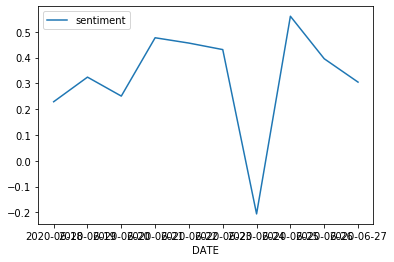

In [42]:
sentiment.plot()